# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rafi Nanda Edtrian]
- **Email:** [mc308d5y1092@student.devacademy.id]
- **ID Dicoding:** [MC308D5Y1092]

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah rental sepeda berdasarkan musim?
- Apa hubungan antara jam dan jumlah rental sepeda?
- Apa faktor-faktor yang mempengaruhi jumlah rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
from IPython.display import display

## Data Wrangling

### Gathering Data

In [174]:
# Memuat tabel hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [175]:
#Menilai data day
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [176]:
# Menghapus kolom yang tidak digunakan

drop_columns = ['instant','yr','temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

hour_df = hour_df.drop(columns=drop_columns)

print(hour_df.head())

       dteday  season  mnth  hr  holiday  weekday  workingday  weathersit  cnt
0  2011-01-01       1     1   0        0        6           0           1   16
1  2011-01-01       1     1   1        0        6           0           1   40
2  2011-01-01       1     1   2        0        6           0           1   32
3  2011-01-01       1     1   3        0        6           0           1   13
4  2011-01-01       1     1   4        0        6           0           1    1


In [177]:
# Mengubah dteday menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [178]:
# Mengubah data int menjadi category
columns_hour = ['season', 'mnth', 'hr','weekday','workingday', 'weathersit']

for column in columns_hour:
    hour_df[column] = hour_df[column].astype("category")

In [179]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   mnth        17379 non-null  category      
 3   hr          17379 non-null  category      
 4   holiday     17379 non-null  int64         
 5   weekday     17379 non-null  category      
 6   workingday  17379 non-null  category      
 7   weathersit  17379 non-null  category      
 8   cnt         17379 non-null  int64         
dtypes: category(6), datetime64[ns](1), int64(2)
memory usage: 511.3 KB
None


In [180]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [181]:
# Memeriksa missing value
hour_df.isna().sum()

,0
dteday,0
season,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
cnt,0


In [182]:
# Mengubah nama kolom
hour_df = hour_df.rename(columns={
    'dteday': 'dateday',
    'season': 'season',
    'mnth': 'month',
    'hr': 'hour',
    'cnt': 'count',
    'weathersit': 'weather'
})

print(hour_df.head())

     dateday season month hour  holiday weekday workingday weather  count
0 2011-01-01      1     1    0        0       6          0       1     16
1 2011-01-01      1     1    1        0       6          0       1     40
2 2011-01-01      1     1    2        0       6          0       1     32
3 2011-01-01      1     1    3        0       6          0       1     13
4 2011-01-01      1     1    4        0       6          0       1      1


In [183]:
# Mengubah season
hour_df['season'] = hour_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

<ipython-input-183-efa5f78a3930>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['season'] = hour_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})


In [186]:
# Mengubah month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

hour_df['month'] = hour_df['month'].replace(month_mapping)


In [185]:
# Mengubah weather
hour_df['weather'] = hour_df['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
    })

In [187]:
# Mengubah weekday
weekday_mapping = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu',
             4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}

hour_df['weekday'] = hour_df['weekday'].replace(weekday_mapping)


<ipython-input-187-919273e4055e>:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['weekday'] = hour_df['weekday'].replace(weekday_mapping)


In [192]:
jam_bins = [0, 6, 12, 18, 24]
jam_labels = ['Dini Hari', 'Pagi', 'Siang', 'Malam']
hour_df['hour'] = pd.cut(hour_df['hour'], bins=jam_bins, labels=jam_labels, right=False)

In [193]:
# Menggabungkan data ke penyewaan harian
penyewaan_harian = hour_df.groupby(['dateday', 'workingday', 'holiday'])['count'].sum().reset_index()

<ipython-input-193-732185943526>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  penyewaan_harian = hour_df.groupby(['dateday', 'workingday', 'holiday'])['count'].sum().reset_index()


In [194]:
print(hour_df.head())

     dateday  season month       hour  holiday weekday workingday  \
0 2011-01-01  spring   Jan  Dini Hari        0   Sabtu          0   
1 2011-01-01  spring   Jan  Dini Hari        0   Sabtu          0   
2 2011-01-01  spring   Jan  Dini Hari        0   Sabtu          0   
3 2011-01-01  spring   Jan  Dini Hari        0   Sabtu          0   
4 2011-01-01  spring   Jan  Dini Hari        0   Sabtu          0   

               weather  count  
0  Clear/Partly Cloudy     16  
1  Clear/Partly Cloudy     40  
2  Clear/Partly Cloudy     32  
3  Clear/Partly Cloudy     13  
4  Clear/Partly Cloudy      1  


In [195]:
# Menyimpan dataset hasil cleaning
hour_df.to_csv('hour_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [196]:
hour_df.head()

,dateday,season,month,hour,holiday,weekday,workingday,weather,count
0,2011-01-01,spring,Jan,Dini Hari,0,Sabtu,0,Clear/Partly Cloudy,16
1,2011-01-01,spring,Jan,Dini Hari,0,Sabtu,0,Clear/Partly Cloudy,40
2,2011-01-01,spring,Jan,Dini Hari,0,Sabtu,0,Clear/Partly Cloudy,32
3,2011-01-01,spring,Jan,Dini Hari,0,Sabtu,0,Clear/Partly Cloudy,13
4,2011-01-01,spring,Jan,Dini Hari,0,Sabtu,0,Clear/Partly Cloudy,1


In [197]:
# melihat rangkuman parameter statistik
hour_df.describe(include="all")

,dateday,season,month,hour,holiday,weekday,workingday,weather,count
count,17379,17379,17379,17379,17379.000000,17379,17379.0,17379,17379.000000
unique,NaN,4,12,4,NaN,7,2.0,4,NaN
top,NaN,fall,Jul,Siang,NaN,Sabtu,1.0,Clear/Partly Cloudy,NaN
freq,NaN,4496,1488,4375,NaN,2512,11865.0,11413,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,0.028770,NaN,NaN,NaN,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,977.000000


In [198]:
# Mengelompokkan data dan menghitung rata-rata 'count'
rata_rata_penyewaan = hour_df.groupby(['season', 'holiday', 'workingday'])['count'].mean().reset_index()

<ipython-input-198-0c06d14b99ef>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rata_rata_penyewaan = hour_df.groupby(['season', 'holiday', 'workingday'])['count'].mean().reset_index()


In [217]:
# Mengelompokkan data dan menghitung jumlah penyewaan per jam untuk setiap musim
hourly_rental_counts = hour_df.groupby(['hour', 'season'], observed=False)['count'].sum().reset_index()

# Memfilter data untuk musim semi
spring_data = hourly_rental_counts[hourly_rental_counts['season'] == 'spring']

# Memfilter data untuk musim panas
summer_data = hourly_rental_counts[hourly_rental_counts['season'] == 'summer']

# Memfilter data untuk musim gugur
fall_data = hourly_rental_counts[hourly_rental_counts['season'] == 'fall']

# Memfilter data untuk musim dingin
winter_data = hourly_rental_counts[hourly_rental_counts['season'] == 'winter']

## Visualization & Explanatory Analysis

## Pertanyaan 1: Bagaimana perbandingan rata-rata jumlah penyewaan sepeda antara hari libur dan hari kerja pada setiap musim ?

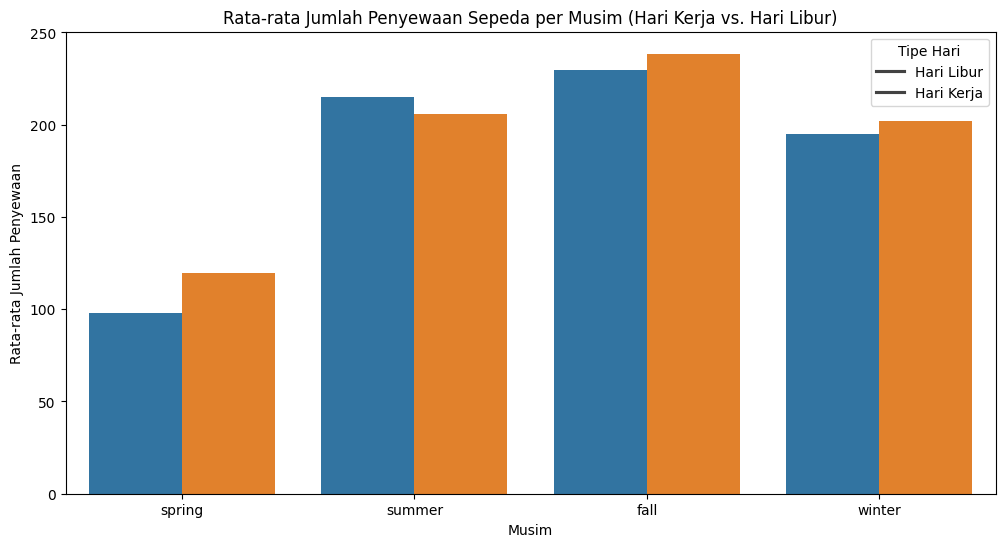

In [220]:
# Membuat bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count', hue='workingday', data=rata_rata_penyewaan[rata_rata_penyewaan['holiday'] == 0])
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Musim (Hari Kerja vs. Hari Libur)')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.legend(title='Tipe Hari', labels=['Hari Libur', 'Hari Kerja'])
plt.show()

### Pertanyaan 2: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

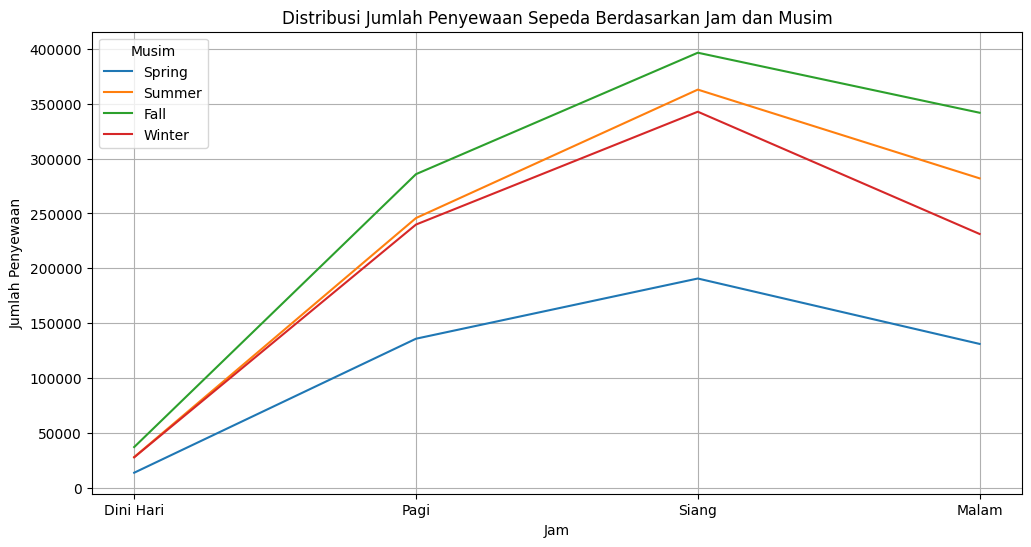

In [221]:
# Membuat line chart untuk setiap musim
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count', data=spring_data, label='Spring')
sns.lineplot(x='hour', y='count', data=summer_data, label='Summer')
sns.lineplot(x='hour', y='count', data=fall_data, label='Fall')
sns.lineplot(x='hour', y='count', data=winter_data, label='Winter')

plt.title('Distribusi Jumlah Penyewaan Sepeda Berdasarkan Jam dan Musim')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Musim')
plt.grid(True)
plt.show()

### Pertanyaan 3: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

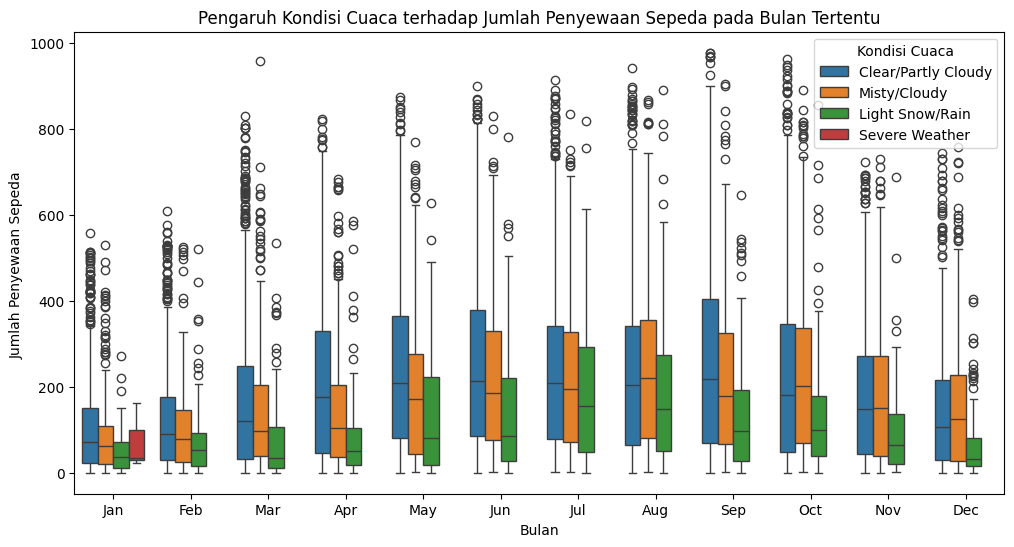

In [222]:
# Membuat box plot
plt.figure(figsize=(12, 6))

sns.boxplot(x='month', y='count', hue='weather', data=hour_df)  # Menggunakan hour_df

plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda pada Bulan Tertentu')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda ')
plt.legend(title='Kondisi Cuaca')

plt.show()

## Conclusion
1. Pengaruh Musim Terhadap Penyewaan Sepeda
Pola Musiman menunjukkan adanya perbedaan signifikan dalam jumlah penyewaan sepeda di berbagai musim. Musim musim panas (summer) cenderung memiliki jumlah penyewaan yang lebih tinggi dibandingkan dengan musim dingin (winter), yang mencerminkan kecenderungan orang untuk lebih sering menggunakan sepeda saat cuaca lebih hangat dan nyaman.

Selain itu, musim gugur (fall) dan semi (spring) juga menunjukkan pola penyewaan yang cukup tinggi, tetapi tidak setinggi musim panas, yang lebih mungkin dipengaruhi oleh suhu yang lebih rendah dibandingkan dengan musim panas.

2. Pengaruh Hari Kerja vs Hari Libur
Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur. Hal ini mungkin disebabkan oleh banyak orang yang menggunakannya sebagai moda transportasi untuk bekerja atau beraktivitas di luar rumah.

Pada sisi lain, jumlah penyewaan lebih rendah di hari libur, yang bisa disebabkan oleh orang-orang yang lebih memilih untuk beristirahat di rumah atau menggunakan moda transportasi lain untuk rekreasi.

3. Distribusi Penyewaan Sepeda Berdasarkan Jam
Terdapat pola yang jelas pada distribusi penyewaan sepeda per jam. Penyewaan sepeda menunjukkan puncaknya pada jam sibuk pagi (6:00 AM - 8:00 AM) dan sore (4:00 PM - 6:00 PM), yang mungkin mencerminkan penggunaan sepeda sebagai transportasi untuk perjalanan ke tempat kerja atau pulang kerja.

Sebaliknya, pada jam-jam malam hari dan siang hari penyewaan sepeda cenderung lebih rendah, menunjukkan bahwa penggunaan sepeda lebih terbatas pada jam kerja atau jam sibuk transportasi.

4. Pengaruh Kondisi Cuaca
Cuaca buruk seperti hujan ringan, salju, atau cuaca ekstrem jelas mengurangi jumlah penyewaan sepeda. Pada kondisi cuaca buruk, banyak orang cenderung menghindari menggunakan sepeda, memilih untuk menggunakan moda transportasi lain yang lebih aman dan nyaman.

Sebaliknya, pada cuaca cerah dan hangat, penyewaan sepeda lebih banyak, terutama selama musim panas dan semi, yang menunjukkan bahwa cuaca memainkan peran besar dalam menentukan pola penggunaan sepeda.

5. Pengaruh Bulan dan Musim dalam Distribusi Penyewaan
Penyewaan sepeda berdasarkan bulan menunjukkan pola musiman yang berbeda di setiap bulan. Sebagian besar penyewaan terjadi di bulan-bulan musim semi dan musim panas, sementara bulan-bulan musim dingin dan musim gugur cenderung memiliki penyewaan lebih rendah.

Penyewaan selama bulan Mei hingga Agustus terlihat lebih tinggi, mungkin karena cuaca yang lebih baik, liburan musim panas, dan peningkatan aktivitas luar ruangan.